<a href="https://colab.research.google.com/github/bungongtoto/OIBSIP/blob/main/project_1_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Let's import our librabries to use**


*   **pandas** which provide functions for data manipulation
*   **matplotlib** and **seaborn** which will used for data visualization



In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# **Loading our data**


1.   Note that data was uploaded in my drive then mounted in google colab




In [61]:
data = pd.read_csv("/content/drive/MyDrive/osasis internship project dataset/project 1/datasets/dataset 1/retail_sales_dataset.csv")

# **First Glanse on data**

*   observe the head ie the first 5 rows
*   observe the tail ie is the last five rows
*   observe the data general information



In [62]:
#observe the head ie the first 5 rows
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [63]:
#observe the tail ie the last 5 rows
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [64]:
#observe the data general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# *Cleaning Our data*
  In this dataset, we dont need to check for null values because from obeserving the resuls from the data.info(), we have 1000 entries for each column and all the columns have 1000 non-null  counts.

  But we still proceed with

*   checking for null values
*   checking for duplicates


  

In [65]:
data.shape


(1000, 9)

In [66]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [67]:
data.duplicated().sum()

0

# **Descriptive Statistics**

*   We our going to use a build in function in pandas describe(), which will provide summary of the nnumerical columns
*   And also calculate the mode



In [68]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [69]:
#mode for age column ie the most frequent age we encounter in the shop
print( data['Age'].mode()[0])

43


In [70]:
#mode for Quantity column ie the most frequent age we encounter in the shop
print( data['Quantity'].mode()[0])

4


In [71]:
#mode for Price per Unit column ie the most frequent age we encounter in the shop
print( data['Price per Unit'].mode()[0])

50


In [72]:
#mode for Total Amount column ie the most frequent age we encounter in the shop
print( data['Total Amount'].mode()[0])

50


# **Time Series Analaysis**

*   sales trend over time
*   plot of Quantity and time
*   plot of Age and time
*   plot of category and time
*   List item



In [73]:
# Convert timestamp column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

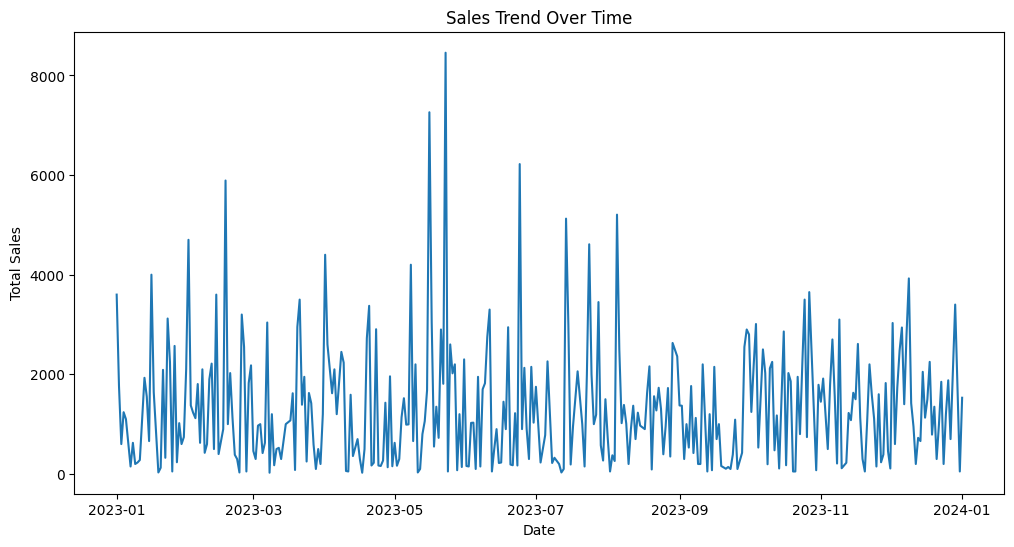

In [78]:
# Calculate the total sales for each date
sales_by_date = data.groupby('Date')['Total Amount'].sum()

# Plot the total sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.show()


In [75]:
# getting the different product categories.
data.groupby("Product Category").count()

,Transaction ID,Date,Customer ID,Gender,Age,Quantity,Price per Unit,Total Amount
Product Category,,,,,,,,
Beauty,307,307,307,307,307,307,307,307
Clothing,351,351,351,351,351,351,351,351
Electronics,342,342,342,342,342,342,342,342


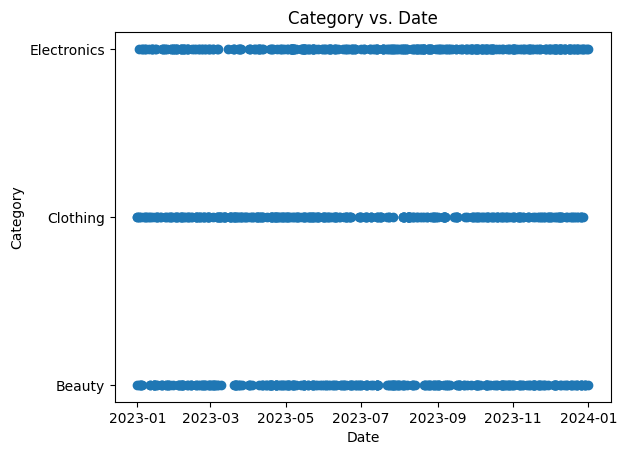

In [76]:
# plotting category by date
plt.plot_date(data["Date"], data['Product Category'], linestyle='')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Category')
plt.title('Category vs. Date')

# Show the plot
plt.show()

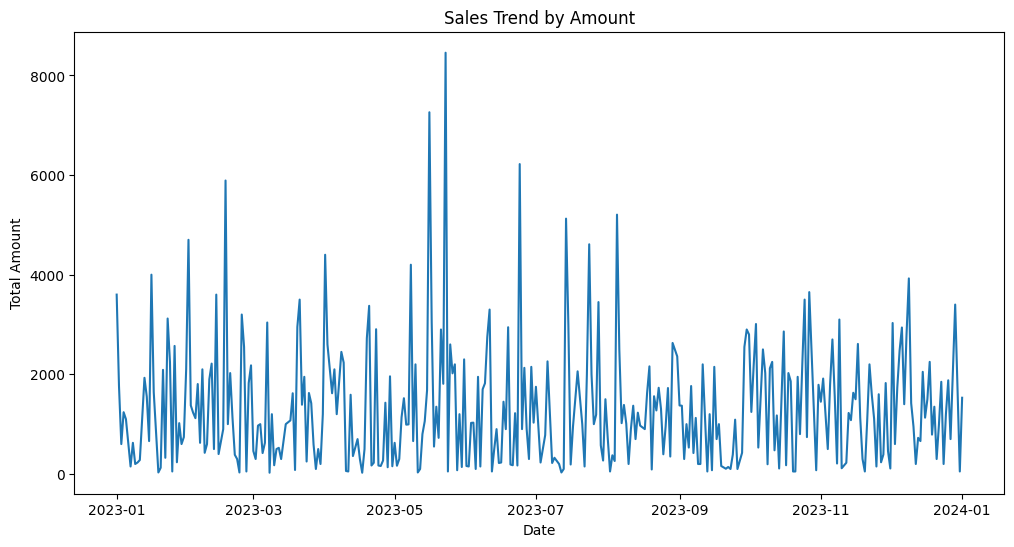

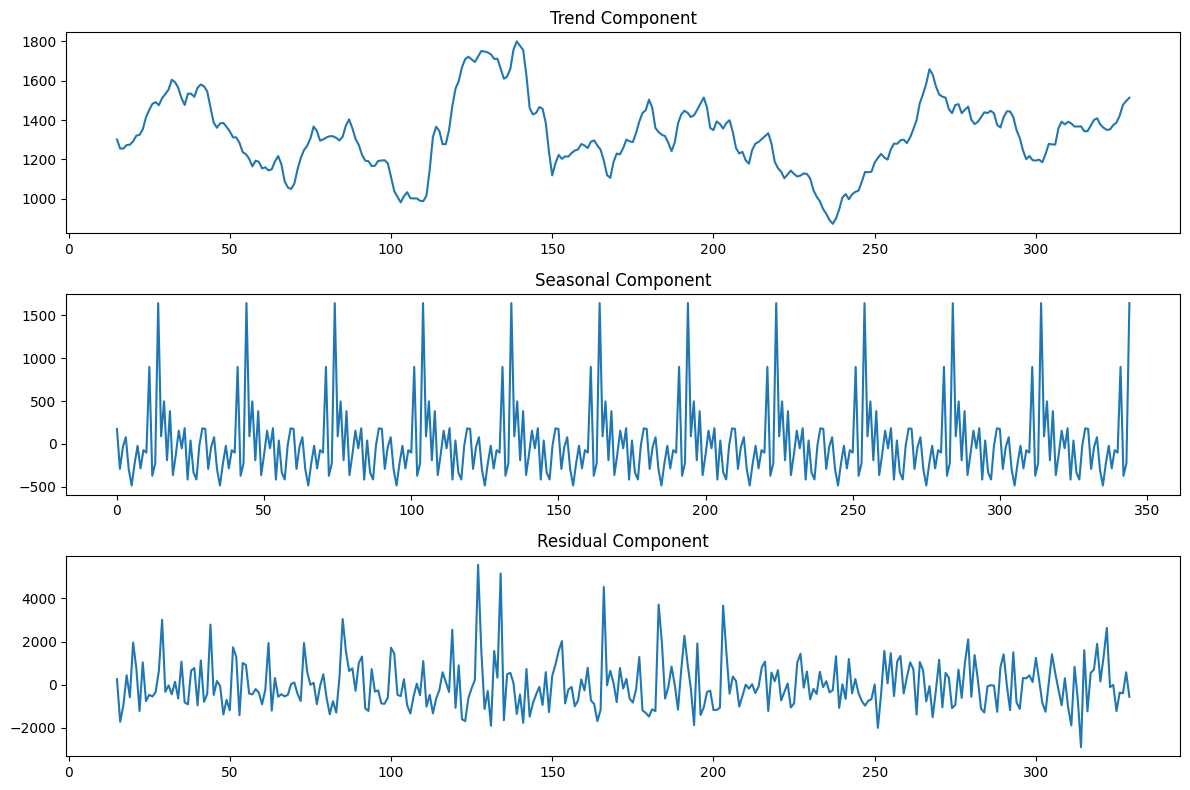

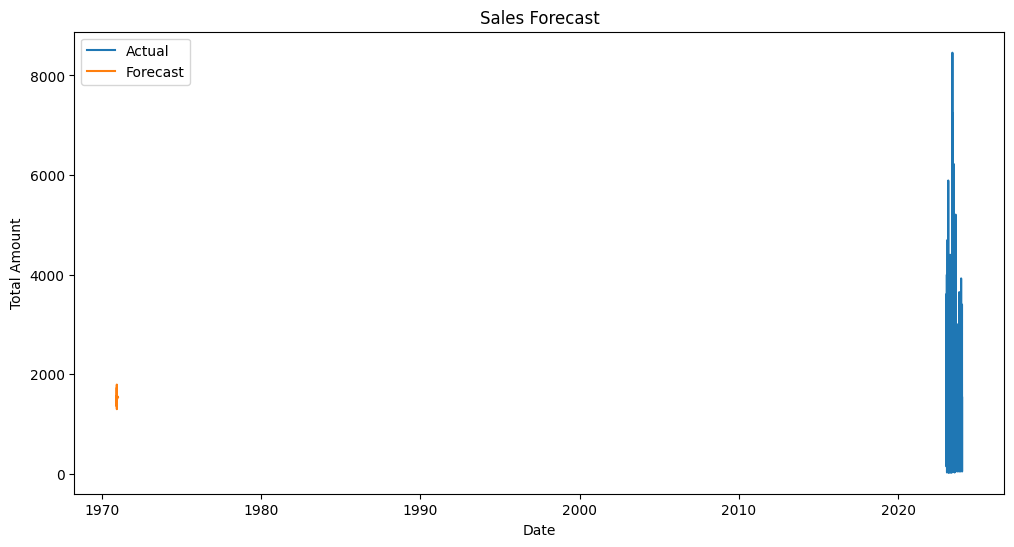

In [79]:
# prompt: Time Series Analysis: Analyze sales trends over time using time series techniques. the date should be acurate

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group data by date and calculate sum of 'Total Amount'
sales_by_date = data.groupby('Date')['Total Amount'].sum().reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Amount'])
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Sales Trend by Amount')
plt.show()

# Perform time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(sales_by_date['Total Amount'], model='additive', period=30)

# Plot the decomposed components
fig, axs = plt.subplots(3, 1, figsize=(12, 8))
result.trend.plot(ax=axs[0])
axs[0].set_title('Trend Component')
result.seasonal.plot(ax=axs[1])
axs[1].set_title('Seasonal Component')
result.resid.plot(ax=axs[2])
axs[2].set_title('Residual Component')
plt.tight_layout()
plt.show()

# Forecast future sales using a time series model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sales_by_date['Total Amount'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Amount'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Sales Forecast')
plt.legend()
plt.show()


# **Customer Demographics**


*   Total Amount Spent by Age Group
*   Total Amount Spent by Gender


# **Purchasing behavior**


*   Total Amount Spent by Product Category
*   Total Quantity Purchased by Product Category



In [ ]:
# customer demographics and purchasing behavior.

# Analyze customer demographics
age_groups = data.groupby('Age')['Total Amount'].sum()
gender_groups = data.groupby('Gender')['Total Amount'].sum()

# Analyze purchasing behavior
category_totals = data.groupby('Product Category')['Total Amount'].sum()
quantity_totals = data.groupby('Product Category')['Quantity'].sum()

# Visualize customer demographics
plt.figure(figsize=(12, 6))
age_groups.plot(kind='bar')
plt.title('Total Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent')
plt.show()

plt.figure(figsize=(12, 6))
gender_groups.plot(kind='bar')
plt.title('Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.show()

# Visualize purchasing behavior
plt.figure(figsize=(12, 6))
category_totals.plot(kind='bar')
plt.title('Total Amount Spent by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.show()

plt.figure(figsize=(12, 6))
quantity_totals.plot(kind='bar')
plt.title('Total Quantity Purchased by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Purchased')
plt.show()


# **Visualisation**


*   Total Sales by Product Category and Month
*   Category preference by age



In [ ]:
# Heatmap of total sales by product category and month
plt.figure(figsize=(12, 6))
heatmap_data = pd.crosstab(pd.to_datetime(data['Date']).dt.month, data['Product Category'], values=data['Total Amount'], aggfunc='sum')
sns.heatmap(heatmap_data, cmap='PuBuGn')
plt.title('Total Sales by Product Category and Month')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

In [ ]:
# heatmap of catergory count over Age
plt.figure(figsize=(12, 6))
heatmap_data = pd.crosstab(data['Age'], data['Product Category'], values=data['Total Amount'], aggfunc='sum')
sns.heatmap(heatmap_data, cmap='PuBuGn')
plt.xlabel('Category')
plt.ylabel('Age')
plt.title('Category Count by Customers Age')
plt.figure(figsize=(12, 6))
plt.show()

In [ ]:
# Bar chart of total sales by product category
plt.figure(figsize=(12, 6))
data.groupby('Product Category')['Total Amount'].sum().plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# Line plot of average quantity sold per day
plt.figure(figsize=(12, 6))
data.groupby('Date')['Quantity'].mean().plot(kind='line')
plt.title('Average Quantity Sold per Day')
plt.xlabel('Date')
plt.ylabel('Average Quantity Sold')
plt.show()


